In [9]:
#Ignore 'Future Warnings'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [11]:
seed=42

In [12]:
df=pd.read_excel ('../data/1a_offset.xlsx',index_col=0,na_values=['..'])
year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]

df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)

In [13]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
#print('Train/Test Split Complete')

#Impliment SMOTE
sm = SMOTE(random_state = seed) 
X_train, Y_train = sm.fit_sample(X_train, Y_train)
#print('oversampling complete')

pca = PCA(.8)
principalComponents = pca.fit_transform(X_train)
print(pca.n_components_)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

163


In [21]:
model = XGBClassifier(random_state = seed)

In [22]:
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

0.8654434250764526
0.823871906841339
0.9027331189710611


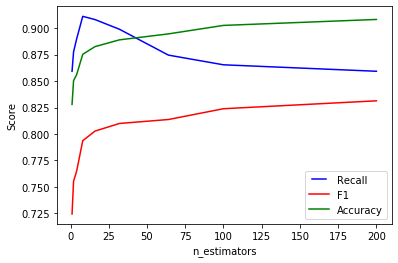

In [23]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
recall_results = []
f1_results = []
accuracy_results = []

for estimator in tqdm(n_estimators):
    model = XGBClassifier(n_estimators = estimator)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(n_estimators, recall_results, 'b', label='Recall')
line2, = plt.plot(n_estimators, f1_results, 'r', label='F1')
line3, = plt.plot(n_estimators, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:12<00:00, 21.36s/it]


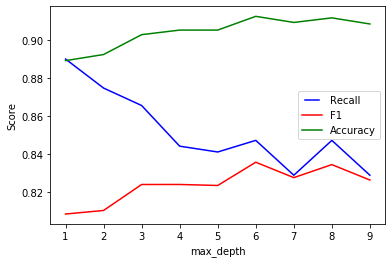

In [27]:
recall_results = []
f1_results = []
accuracy_results = []

max_depths = list(range(1,10))

for max_depth in tqdm(max_depths):
    model = XGBClassifier(max_depth=max_depth)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(max_depths, recall_results, 'b', label='Recall')
line2, = plt.plot(max_depths, f1_results, 'r', label='F1')
line3, = plt.plot(max_depths, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depth')
plt.show()